# **Foundations of PyTorch**

Deep learning - algorithms that learn which features matter. Made up of different layers of neural networks.

Different layers in a network can be used to find different features, layers which we dont interact directly with are the hidden layers.

Neuron - has an activation function, any number of inputs (vector of values) and then produces an output of the neuron. The outputs of neuros feed into the neuros from the next layer. Each connection has an assosicted wieght value.

If the second neuron is sensituve to the output of the first neuron, the connection between them gets stronger.

Neuron:
Affine transformation : Wx+b -> max(Wx+b,0) (the activation function) for non linear relationships.

Common activation functions: ReLU, logit (logistic sigmoid function), tanh, step, softmax(0,1) output is a probability.

## 1. Tensor Basics

The central unit of data in PyTorch. A tensor consists of a set of primitive values shaped into an arry of any number of dimensions

Vectos are 1-D tensors [1,2,3]
Tensors are N-D tensors [[1,2][1,2]]
They are numpy arrays that have the ability to be executed on GPUs.

In [1]:
import torch

print(torch.__version__)

1.6.0


Base datatype of a Tensor and changing the datatype for tensors:

In [20]:
torch.get_default_dtype()

torch.float32

In [21]:
torch.set_default_dtype(torch.float64)

### 1.1 Creating and Initializing tensors

In [22]:
tensor_arr = torch.Tensor([[1,2,3],[4,5,6]])
tensor_arr

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [23]:
torch.is_tensor(tensor_arr)

True

In [24]:
torch.numel(tensor_arr)

6

In [25]:
tensor_uninitialized = torch.Tensor(2,2)
tensor_uninitialized

tensor([[6.1168e+169, 2.8793e+180],
        [3.4667e+179,  1.7714e-51]])

In [26]:
tensor_initialized = torch.rand(2,2)
tensor_initialized

tensor([[0.8388, 0.2903],
        [0.4427, 0.8309]])

In [27]:
tensor_int = torch.tensor([5,3]).type(torch.IntTensor)
tensor_int

tensor([5, 3], dtype=torch.int32)

In [28]:
tensor_short = torch.ShortTensor([1.0,2.0,3.0])
tensor_short

tensor([1, 2, 3], dtype=torch.int16)

In [29]:
tensor_float = torch.tensor([5,3]).type(torch.half)
tensor_float

tensor([5., 3.], dtype=torch.float16)

In [35]:
tensor_fill = torch.full((2,6),fill_value=10.0)
tensor_fill

tensor([[10., 10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10., 10.]])

In [37]:
tensor_one = torch.ones((2,4),dtype=torch.int32)
tensor_one

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int32)

In [38]:
tensor_zeros = torch.zeros_like(tensor_one)
tensor_zeros

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [41]:
tensor_eye = torch.eye(4)
tensor_eye

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [43]:
#Returns coordinates of all non-zero elements in tensor
non_zero = torch.nonzero(tensor_eye)
non_zero

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3]])

In [51]:
i = torch.tensor([[0,1,1,],
                  [2,2,0]])

In [45]:
v = torch.tensor([3,4,5],dtype=torch.float32)

In [52]:
sparse_tensor = torch.sparse_coo_tensor(i,v,[2,5])
sparse_tensor.data

tensor(indices=tensor([[0, 1, 1],
                       [2, 2, 0]]),
       values=tensor([3., 4., 5.]),
       size=(2, 5), nnz=3, dtype=torch.float32, layout=torch.sparse_coo)

### 1.2 Simple operations with Tensors

In [57]:
initial_tensor = torch.rand(2,3)
initial_tensor

tensor([[0.3047, 0.0130, 0.5577],
        [0.2282, 0.9586, 0.6640]])

In [58]:
# Operations that modilfy the tensor in-place have an "_" suffix
initial_tensor.fill_(10)

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [59]:
# Not all tensors have an option for not in place
initial_tensor.fill(10)

AttributeError: 'Tensor' object has no attribute 'fill'

In [62]:
# add() out of place operation and stores result in new tensor
new_tensor = initial_tensor.add(5)
new_tensor

tensor([[15., 15., 15.],
        [15., 15., 15.]])

In [63]:
#Note the initial tensor has not changed since it was not an inplace operation
initial_tensor

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [64]:
#add_() in-place operation
initial_tensor.add_(8)
initial_tensor

tensor([[18., 18., 18.],
        [18., 18., 18.]])

In [66]:
new_tensor.sqrt_()
new_tensor

tensor([[3.8730, 3.8730, 3.8730],
        [3.8730, 3.8730, 3.8730]])

In [68]:
#uses lots of numpy functions
x = torch.linspace(start=0.1,end=10.0,steps=15)
x

tensor([ 0.1000,  0.8071,  1.5143,  2.2214,  2.9286,  3.6357,  4.3429,  5.0500,
         5.7571,  6.4643,  7.1714,  7.8786,  8.5857,  9.2929, 10.0000])

In [70]:
#split the x tensor into 3 parts third variable is the dimension we want to do it in
tensor_chunk = torch.chunk(x,3,0)
tensor_chunk

(tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286]),
 tensor([3.6357, 4.3429, 5.0500, 5.7571, 6.4643]),
 tensor([ 7.1714,  7.8786,  8.5857,  9.2929, 10.0000]))

In [74]:
# to join tensors use torch.cat()
tensor1 = tensor_chunk[0]
tensor2 = tensor_chunk[1]
tensor3 = torch.tensor([1,2,3])

torch.cat((tensor1,tensor2,tensor3),0)

tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286, 3.6357, 4.3429, 5.0500, 5.7571,
        6.4643, 1.0000, 2.0000, 3.0000])

In [76]:
random_tensor = torch.Tensor([[10,8,30],[40,5,6],[12,2,21]])
random_tensor

tensor([[10.,  8., 30.],
        [40.,  5.,  6.],
        [12.,  2., 21.]])

In [77]:
random_tensor[0,1]

tensor(8.)

In [78]:
random_tensor[1:,1:]

tensor([[ 5.,  6.],
        [ 2., 21.]])

In [79]:
random_tensor.size()

torch.Size([3, 3])

In [84]:
#.view() doesnt create a new tensor but shares the same place in memory as the original
resized_tensor = random_tensor.view(9)
resized_tensor

tensor([ 10.,   8.,  30.,  40.,   5.,   6.,  12.,   2., 100.])

In [85]:
resized_tensor.size()

torch.Size([9])

In [87]:
#change 2,2 in original reuslts in a change in the resized_tensor
random_tensor[2,2] = 100.0
resized_tensor

tensor([ 10.,   8.,  30.,  40.,   5.,   6.,  12.,   2., 100.])

In [88]:
random_tensor.shape

torch.Size([3, 3])

In [92]:
random_tensor

tensor([[ 10.,   8.,  30.],
        [ 40.,   5.,   6.],
        [ 12.,   2., 100.]])

In [101]:
#Change a dimension of a tensor by using squeeze and unsqueeze
tensor_unsqueeze = torch.unsqueeze(random_tensor,2)
tensor_unsqueeze

tensor([[[ 10.],
         [  8.],
         [ 30.]],

        [[ 40.],
         [  5.],
         [  6.]],

        [[ 12.],
         [  2.],
         [100.]]])

In [100]:
#we have added an extra dimension 3x3x1 now
tensor_unsqueeze.shape

torch.Size([3, 1, 3])

In [98]:
initial_tensor 

tensor([[18., 18., 18.],
        [18., 18., 18.]])

In [102]:
tensor_transpose = torch.transpose(initial_tensor,0,1)
tensor_transpose

tensor([[18., 18.],
        [18., 18.],
        [18., 18.]])

### 1.3 Elementwise and Matrix operations on Tensors

In [103]:
random_tensor

tensor([[ 10.,   8.,  30.],
        [ 40.,   5.,   6.],
        [ 12.,   2., 100.]])

In [117]:
sorted_tensor, sorted_indices = torch.sort(random_tensor)

In [118]:
sorted_tensor

tensor([[  8.,  10.,  30.],
        [  5.,   6.,  40.],
        [  2.,  12., 100.]])

In [119]:
sorted_indices

tensor([[1, 0, 2],
        [1, 2, 0],
        [1, 0, 2]])

In [121]:
tensor_float = torch.FloatTensor([-1.1,-2.2,3.3])
tensor_float

tensor([-1.1000, -2.2000,  3.3000], dtype=torch.float32)

In [122]:
tensor_abs = torch.abs(tensor_float)
tensor_abs

tensor([1.1000, 2.2000, 3.3000], dtype=torch.float32)

In [123]:
rand1 = torch.abs(torch.rand(2,3))
rand2 = torch.abs(torch.rand(2,3))

In [124]:
add = rand1+rand2
add

tensor([[0.9696, 1.8206, 0.3003],
        [0.3730, 1.0690, 1.1197]])

In [126]:
add2 = torch.add(rand1,rand2)
add2

tensor([[0.9696, 1.8206, 0.3003],
        [0.3730, 1.0690, 1.1197]])

In [127]:
tensor = torch.Tensor([[-1,-2,-3],[1,2,3]])

In [128]:
tensor_div = torch.div(tensor,tensor+0.3)
tensor_div

tensor([[1.4286, 1.1765, 1.1111],
        [0.7692, 0.8696, 0.9091]])

In [131]:
tensor_mul = tensor.mul(tensor)
tensor_mul

tensor([[1., 4., 9.],
        [1., 4., 9.]])

In [132]:
tensor_clamp = torch.clamp(tensor,min=-0.2,max=2)
tensor_clamp

tensor([[-0.2000, -0.2000, -0.2000],
        [ 1.0000,  2.0000,  2.0000]])

In [133]:
t1 = torch.Tensor([1,2])
t2 = torch.Tensor([10,20])

In [135]:
dot_product = torch.dot(t1,t2)
dot_product

tensor(50.)

In [136]:
matrix = torch.Tensor([[1,2,3],
                       [4,5,6]])
vector = torch.Tensor([0,1,2])

In [137]:
matrix_vector = torch.mv(matrix,vector)
matrix_vector

tensor([ 8., 17.])

In [138]:
matrix2 = torch.Tensor([[10,30],[20,0],[50,0]])

In [141]:
matrix_mul = torch.mm(matrix,matrix2)
matrix_mul

tensor([[200.,  30.],
        [440., 120.]])

In [143]:
torch.argmax(matrix_mul,dim=1)

tensor([0, 0])

In [144]:
torch.argmin(matrix_mul,dim=1)

tensor([1, 1])

### 1.4 Conversion between Pytorch and NumPy

In [147]:
import numpy as np
import torch

In [149]:
tensor = torch.rand(4,3)
tensor

tensor([[0.1987, 0.4570, 0.3728],
        [0.8298, 0.1654, 0.6824],
        [0.9997, 0.6014, 0.1287],
        [0.6674, 0.2404, 0.1548]])

In [ ]:
type(tensor)

In [151]:
numpy_from_tensor = tensor.numpy()
numpy_from_tensor

array([[0.19870377, 0.45699255, 0.37283333],
       [0.8297834 , 0.16538464, 0.68242655],
       [0.99968894, 0.60140543, 0.12871409],
       [0.66743587, 0.24039005, 0.15483137]])

In [152]:
type(numpy_from_tensor)

numpy.ndarray

The NumPy array and the PyTorch tensor share underlying memory

In [154]:
numpy_from_tensor[0,0] = 100

In [155]:
tensor

tensor([[100.0000,   0.4570,   0.3728],
        [  0.8298,   0.1654,   0.6824],
        [  0.9997,   0.6014,   0.1287],
        [  0.6674,   0.2404,   0.1548]])

In [159]:
numpy_arr = np.random.rand(3,3)
numpy_arr

array([[0.97902889, 0.03794152, 0.75008729],
       [0.66736971, 0.40700507, 0.95369863],
       [0.08517584, 0.31320742, 0.91102737]])

In [ ]:
tensor_from_numpy = torch.from_numpy(numpy_arr)
tensor_from_numpy

In [161]:
np_array_one = np.array([4,8])

as_tensor() - Preforms copy of the data is not already a tensor - here since we are not changing the data type or device the new tensor will just use the same memory


If the data is alrwady a tensor with the same dtype and the device then no copy is preformed and a new tensor is returned with the same computational graph

To aviod making compies use torch.as_tensor()

In [164]:
tensor_from_array_one = torch.as_tensor(np_array_one)
tensor_from_array_one

tensor([4, 8], dtype=torch.int32)

In [166]:
np_array_one[1] = 5

In [167]:
tensor_from_array_one

tensor([4, 5], dtype=torch.int32)

If you want to make a copy, they dont share the same place in memory so changes made in the NumPy array don't change the tensor.

In [170]:
np_array_two = np.array([2,2])
np_array_two

array([2, 2])

In [175]:
tensor_from_array_two = torch.tensor(np_array_two)
tensor_from_array_two

tensor([2, 2], dtype=torch.int32)

### 1.5 Support for CUDA devices

GPU - specilized chips with highly parallel architecture that makes them faster than CPUs when trainig models. Usage for GPUs traditionally for videos and graphics and used in Big Data and Machine Learning applications. Speed up of 10-50 times.

CUDA - A parallel computing platform and API, a standard for general purpose user of GPUs. If CUDA-enabled GPUs are availabe the speedup will occur automatically.

### 1.6 Setting up VM to work with GPUs

You can use google cloud to us a VM to launching GPUs. https://pytorch.org/get-started/cloud-partners/ to deploy the deep learning VM. Then you can ssh into the VM. You will also need the Cloud SDK.

### 1.7 Creating Tensors on CUDA-enabled devices

**NOTE: ALL THE FOLLOWING COMMANDS HAVE TO BE RUN ON A VM THAT HAS CUDA DEVICES.**

In [3]:
torch.cuda.is_available() #True in VM

False

In [4]:
torch.cuda.init()
torch.cuda.current_device() #device it is using
torch.cuda.device_count() #number of devices used
torch.cuda.memeory_allocated()
torch.cuda.memory_cached() 

#"cuda" refers to the defalut CUDA device that is being used by PyTorch
cuda = torch.device("cuda")

#getting a specific device
cuda0 = torch.device("cuda:0")
cuda1 = torch.device("cuda:1")

#creating a tensor on CPU
x = torch.tensor([10,20])
#creating a tensor on CUDA device
x_default = torch.tensor([10,20], device=cuda)
#creating a tensor on a specific CUDA device
x_1 = torch.tensor([10,20], device=cuda1)

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

In [5]:
#.cuda() Retruns a copy of this object in CUDA memory
#if the tensor is already in CUDA memory and on the correct device no copy is preformed

y = x.cuda() #x is on CPU so now on CUDA using .cuda()

y0 = x1.cuda() #x1 is on cuda1 now y0 is on copied x1 onto CUDA device 0

# "with" can be used to change the cuda device that is running 

with torch.cuda.device[1]:
    a = torch.tensor([10,20]) #CPU
    a0 = torch.tensor([10,20], device=cuda0)#CUDA 0
    a1 = torch.tensor([10,20], device=cuda) #CUDA 1

b1 = a0.to(device=cuda1) #copies and changes the CUDA device

#NOTE : Operations cannot be preformed on different CUDA devices.

NameError: name 'x' is not defined

## 2. Gradients Using the Autograd Library

Gradient descent optimaztion - used train the models. The weights and biases of the individual neurons are determined during the training process. 

Linear regression - we want to minimize a loss function , in our case the least square error. The training occurs in gradient descent optimization.

We have a surface that we want to find the lowest MSE which will be the best parameters (b and w) that give the least square error. y = bx + w. Gradient Descent goes down to find the lowest MSE this is an optimization algorithm.

We start by initializing w and b at random values and use algorithm to get to the lowest MSE, thus finding w and b that result in this value.

### 2.1 Foward Pass and Backwards Pass

Foward pass - all baises have been initialized to random values, the network will use the current weights to predict. The first model will be very poor. Differnce between actual and prediction. This error is used in the optimizer uses the error or loss function and tweaks the model parameters to minimize error.

Backward pass - move backwards to optimize the model parameters to update all the parameters again. At every layer the model uses the gradient descent algorithm. Allows the weights and biases of the neurons to converge to their final values.

### 2.2 Training using Autograd in PyTorch

*Autograd calulates gradients*

Loss = Y_predicted - Y_actual. A gradient is vector of partial derivates.
The gradient is the partial derivative w.r.t the parameter W=(w1,w2,...,wN).

We want to find W such that the loss has the gradient has the lowest gradient.

Automatic differentiation - basis of calulating differenation computationally.

Back propagation is implemeted using a technique called reverse auto-differentiation.

Parameters(t+1) = Parameter(t) - learning_rate * gradient(theta t), think of t as the step.

### 2.3 Automatic Differentiation

Need 2 passes. Reverse-mode auto-differentiation.
1)Foward step: Calucluate loss.
2)Backwards step: Update parameter values.

### 2.4 Introduction to Autograd

In [1]:
import torch

In [13]:
tensor1 = torch.Tensor([[1,2,3],[4,5,6]])

In [14]:
tensor2 = torch.Tensor([[7,8,9],[10,11,12]])

.requires_grad - When True this tracks computations for a tensor in the foward phase and will calculate gradients for this tensor in the backward phase.

In [15]:
tensor1.requires_grad

False

In [16]:
tensor1.requires_grad_()

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [17]:
tensor1.requires_grad

True

In [20]:
output_tensor = tensor1 * tensor2

In [21]:
output_tensor.requires_grad

True

Tensors have reference to the function that created this tensor, user-created tensors have no corresponding function

In [24]:
print(output_tensor.grad_fn)

In [25]:
output_tensor = (tensor1 * tensor2).mean()
print(output_tensor.grad_fn)

In [26]:
print(tensor1.grad)

None


In [27]:
output_tensor.backward()

In [28]:
print(tensor1.grad)

tensor([[1.1667, 1.3333, 1.5000],
        [1.6667, 1.8333, 2.0000]])


In [29]:
tensor1.grad.shape , tensor1.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

In [30]:
print(tensor2.grad)

None


In [31]:
new_tensor = tensor1 * 3
print(new_tensor.requires_grad)

True


In [32]:
new_tensor

tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)

In [40]:
with torch.no_grad():
    new_tensor = tensor1*3
    print("new_tensor =", new_tensor)
    print("requires_grad for tensor =", tensor1.requires_grad)
    print("requires_grad for tensor =", tensor2.requires_grad)
    print("requires_grad for new_tensor =", new_tensor.requires_grad)

new_tensor = tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor = True
requires_grad for tensor = False
requires_grad for new_tensor = False


### 2.5 Working with Gradients

In [42]:
def calculate(t):
    return t*2

In [43]:
#Decorator so no gradient is needed, not enabled
@torch.no_grad()
def calculate_with_no_grad(t):
    return t*2

In [44]:
result_tensor = calculate(tensor1)

result_tensor

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]], grad_fn=<MulBackward0>)

In [45]:
result_tensor.requires_grad

True

In [48]:
result_tensor_no_grad = calculate_with_no_grad(tensor1)

result_tensor_no_grad

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [49]:
result_tensor_no_grad.requires_grad

False

In [50]:
#You can turn on and off grad with "with" embbedded
with torch.no_grad():
    new_tensor_no_grad = tensor1*3
    print("new_tensor_no_grad =", new_tensor_no_grad)
    
    with torch.enable_grad():
        new_tensor_grad = tensor1 * 3
        print("new_tensor_grad =", new_tensor_grad)
        
        

new_tensor_no_grad = tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
new_tensor_grad = tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)


In [53]:
tensor_one = torch.tensor([[1.0,2.0],[3.0,4.0]],requires_grad = True)

In [54]:
tensor_two = torch.Tensor([[5,6],[7,8]])

In [55]:
tensor_one.requires_grad

True

In [56]:
tensor_two.requires_grad_()

tensor([[5., 6.],
        [7., 8.]], requires_grad=True)

In [57]:
final_tensor = (tensor_one + tensor_two).mean()
final_tensor

tensor(9., grad_fn=<MeanBackward0>)

In [58]:
final_tensor.requires_grad

True

In [59]:
print(tensor_one.grad)

None


In [60]:
final_tensor.backward()

In [61]:
print(tensor_one.grad) #gradients calulated wrt to final tensor

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [64]:
#Gradient set to false
detached_tensor = tensor_one.detach()
detached_tensor

tensor([[1., 2.],
        [3., 4.]])

### 2.6 Training a linear model with Autograd

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],
                  [8.9],[5.2],[8.59],[2.1],[8],[10],
                  [4.5],[6],[4]],dtype=np.float32)
y_train = np.array([[2.6],[1.6],[3.09],[2.4],[2.4],[3.357],
                  [2.6],[1.96],[3.53],[1.76],[3.2],[3.5],
                  [1.6],[2.5],[2.2]], dtype = np.float32)

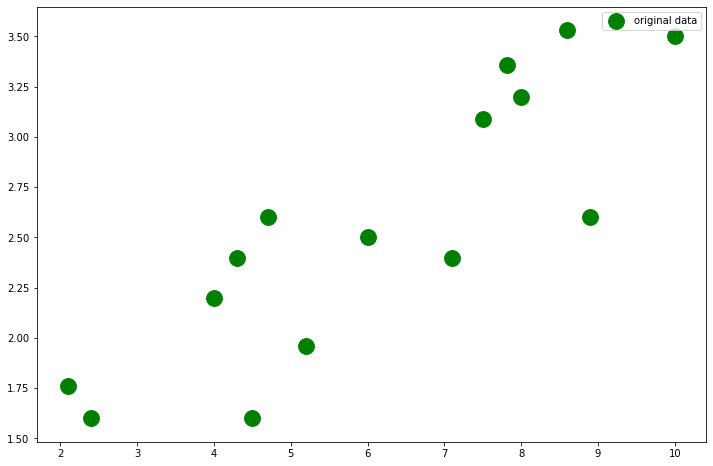

In [18]:
plt.figure(figsize =(12,8))

plt.scatter(x_train,y_train,label="original data",s=250,c="g")
plt.legend()
plt.show()

In [16]:
import torch

In [19]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print("requires_grad for X_train: ", X_train.requires_grad)
print("requires_grad for Y_train: ", Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [20]:
input_size = 1
hidden_size = 1
output_size = 1

In [26]:
#weights to our neuralnet
w1 = torch.rand(input_size,hidden_size,requires_grad=True)
w1.shape

torch.Size([1, 1])

In [27]:
#Connection between hidden layer and final output
w2 = torch.rand(hidden_size,output_size,requires_grad=True)
w2.shape

torch.Size([1, 1])

In [28]:
learning_rate = 1e-6

In [2]:
for iter in range(1,3000):
    
    #Foward pass through our NN
    y_pred = X_train.mm(w1).mm(w2)
    #Mean squared error loss for linear regression
    loss = (y_pred-Y_train).pow(2).sum()
    
    #For every iteration of training
    if iter % 50 == 0:
        print(iter,loss.item())
    
    #Backward pass calculate gradient for model parameters
    loss.backward()
    
    #We dont need to enable grading tracking 
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

NameError: name 'X_train' is not defined

In [52]:
print("w1 :",w1)
print("w2 :",w2)

w1 : tensor([[0.6068]], requires_grad=True)
w2 : tensor([[0.6459]], requires_grad=True)


In [53]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [54]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8423],
        [0.9407],
        [2.9398],
        [2.7830],
        [1.6855],
        [3.0636],
        [3.4885],
        [2.0383],
        [3.3670],
        [0.8231],
        [3.1358],
        [3.9197],
        [1.7639],
        [2.3518],
        [1.5679]], grad_fn=<MmBackward>)

In [55]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8422655 ],
       [0.9407314 ],
       [2.9397855 ],
       [2.7829971 ],
       [1.6854771 ],
       [3.0636487 ],
       [3.4885454 ],
       [2.0382512 ],
       [3.3670347 ],
       [0.82313997],
       [3.1357713 ],
       [3.919714  ],
       [1.7638714 ],
       [2.3518286 ],
       [1.5678856 ]], dtype=float32)

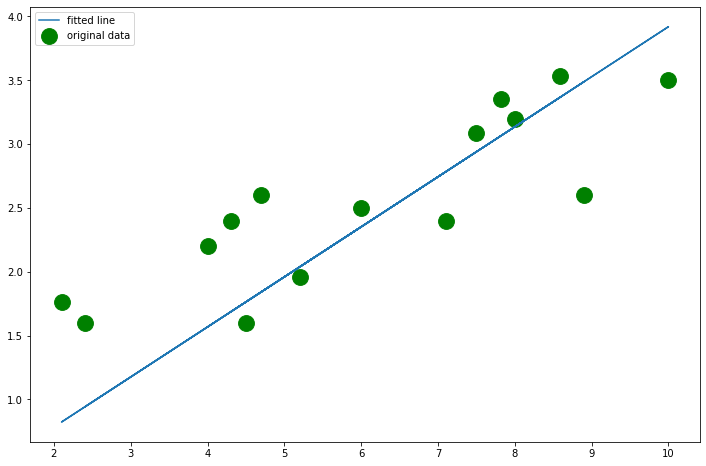

In [56]:
plt.figure(figsize =(12,8))

plt.scatter(x_train,y_train,label="original data",s=250,c="g")
plt.plot(x_train,predicted,label="fitted line")
plt.legend()
plt.show()

## 3. Building Dynamic Computation Graphs

### 3.1 Static vs Dynamic Computation Graphs

Neural neworks are similar to directed-acyclic graphs. All of the computations and tensors in PyTorch together make up a directed-acyclic graph.

Tensors are the nodes and the functions that mutate tensors are the edges.

PyTorch computation graphs are **dynamic**, the graph is defined as it is executed

2 approaches to Computation Graphs; Static(Tensorflow) and Dynamic(PyTorch)

2 types of building NN; Symbolic and Imperative, so you can first define computation then run or run computations are they defined.

**PyTorch -> "Define by Run"**

**TensorFlow -> "Define, then Run"**

In [61]:
import torch

x = torch.randn(1,10)
h = torch.randn(1,20)
W_h = torch.randn(20,20,requires_grad=True)
W_x = torch.randn(20,10,requires_grad=True)

h_prod = torch.mm(W_h,h.t())
x_prod = torch.mm(W_x,x.t())
next_h = (h_prod+x_prod).tanh()
loss = next_h.sum()
loss.backward()
#The above is built downwards and then the loss calulates the gradient upwards at every node (ie opperation)

### 3.1 Static Graphs vs Dynamic Graphs comparison and visualizing NN

In [62]:
!pip install tensorflow
!pip install graphviz
!pip install hiddenlayer

In [63]:
!pip show graphviz

Name: graphviz
Version: 0.14.1
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: c:\users\horacio\anaconda3\envs\speck\lib\site-packages
Requires: 
Required-by: 


In [64]:
import numpy as np
import torch
import torch.nn as nn

In [65]:
W = torch.randn(6)

x = torch.tensor([10.0,10.0,10.0,10.0,10.0,10.0])

b = torch.tensor(3)

In [66]:
W

tensor([-0.0533,  0.9102, -0.0723,  1.0098,  0.2562,  0.8420])

In [67]:
#Creating and executing the computation at the same time
y = W*x + b

In [68]:
y

tensor([ 2.4672, 12.1018,  2.2765, 13.0983,  5.5624, 11.4198])

In [69]:
W*x

tensor([-0.5328,  9.1018, -0.7235, 10.0983,  2.5624,  8.4198])

In [70]:
b

tensor(3)

In [71]:
W1 = torch.tensor(6)
W2 = torch.tensor(6)
W3 = torch.tensor(6)

x1 = torch.tensor([2,2,2])
x2 = torch.tensor([3,3,3])
x3 = torch.tensor([5,5,5])

b = torch.tensor(10)


In [72]:
W1,W2,W3

(tensor(6), tensor(6), tensor(6))

In [73]:
intermidiate_value = W1*x1 +W2*x2
intermidiate_value

tensor([30, 30, 30])

In [74]:
final_value =  W1*x1 + W2*x2 + W3*x3
final_value

tensor([60, 60, 60])

In [75]:
#to visualize neural networks
import hiddenlayer as hl
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [76]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],
                  [8.9],[5.2],[8.59],[2.1]],dtype=np.float32)
y_train = np.array([[2.6],[1.6],[3.09],[2.4],[2.4],[3.357],
                  [2.6],[1.96],[3.53],[1.76]], dtype = np.float32)

In [77]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

X_train.shape

torch.Size([10, 1])

In [78]:
inp = 1 
out = 1

hid = 100

In [79]:
model1 = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                             torch.nn.Linear(hid,out))


(dot.exe:6040): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


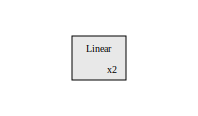

In [82]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/bin/'
hl.build_graph(model1, torch.zeros([10,1]))


(dot.exe:13768): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


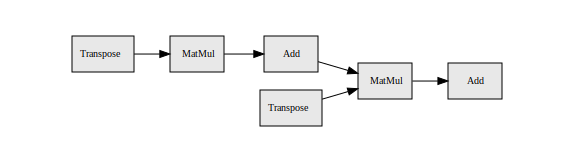

In [83]:
hl.build_graph(model1, torch.zeros([1]))

In [84]:
model2 = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                             torch.nn.Linear(hid,hid),
                             torch.nn.Sigmoid(),
                             torch.nn.Linear(hid,out))


(dot.exe:6644): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


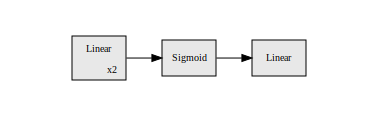

In [85]:
hl.build_graph(model2, torch.zeros([10,1]))


(dot.exe:8320): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


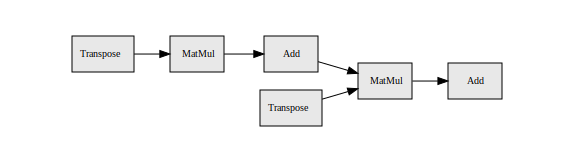

In [86]:
hl.build_graph(model1, torch.zeros([1]))

### 3.3 Tensorflow

In [90]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [92]:
W = tf.Variable(6, name="var_W")
x = tf.placeholder(tf.int32, shape = [3], name = "x")
b = tf.constant(3, name = "constant_b")

In [94]:
W #Info about the value but not the value, because it is static until execution

<tf.Variable 'var_W_1:0' shape=() dtype=int32_ref>

In [95]:
x

<tf.Tensor 'x_1:0' shape=(3,) dtype=int32>

In [96]:
b

<tf.Tensor 'constant_b_1:0' shape=() dtype=int32>

In [97]:
y = W*x + b #here we define the computation graph

In [98]:
y

<tf.Tensor 'add:0' shape=(3,) dtype=int32>

In [100]:
init = tf.global_variables_initializer()

In [102]:
#A session is a bridge between c++ and python code to execute tensorflow
with tf.Session() as sess:
    #Here it inializes the W param
    sess.run(init)
    
    #Here feed_dict feeds into y which defined above
    y_result = sess.run(y, feed_dict = {x:[10, 20, 30]})
    
    print("W*x+b =", y_result)

W*x+b = [ 63 123 183]


In [103]:
writer = tf.summary.FileWriter("./graphs",sess.graph)

In [104]:
writer.close()

In [105]:
graph = tf.get_default_graph()

In [108]:
print(graph.get_operations())

[<tf.Operation 'var_W/initial_value' type=Const>, <tf.Operation 'var_W' type=VariableV2>, <tf.Operation 'var_W/Assign' type=Assign>, <tf.Operation 'var_W/read' type=Identity>, <tf.Operation 'x' type=Placeholder>, <tf.Operation 'constant_b' type=Const>, <tf.Operation 'var_W_1/initial_value' type=Const>, <tf.Operation 'var_W_1' type=VariableV2>, <tf.Operation 'var_W_1/Assign' type=Assign>, <tf.Operation 'var_W_1/read' type=Identity>, <tf.Operation 'x_1' type=Placeholder>, <tf.Operation 'constant_b_1' type=Const>, <tf.Operation 'mul' type=Mul>, <tf.Operation 'add' type=AddV2>, <tf.Operation 'init' type=NoOp>]


Use this to visualize the graph created on command line:
tensorboard --logdir=graphs